<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Sekar_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [25]:
df = pd.read_csv("/content/drive/MyDrive/Sekar/arthdigital.csv")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Creditability,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
Account Balance,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
Duration of Credit (month),1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Payment Status of Previous Credit,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
Purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
Credit Amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Value Savings/Stocks,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
Length of current employment,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
Instalment per cent,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Sex & Marital Status,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0


In [6]:
data.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

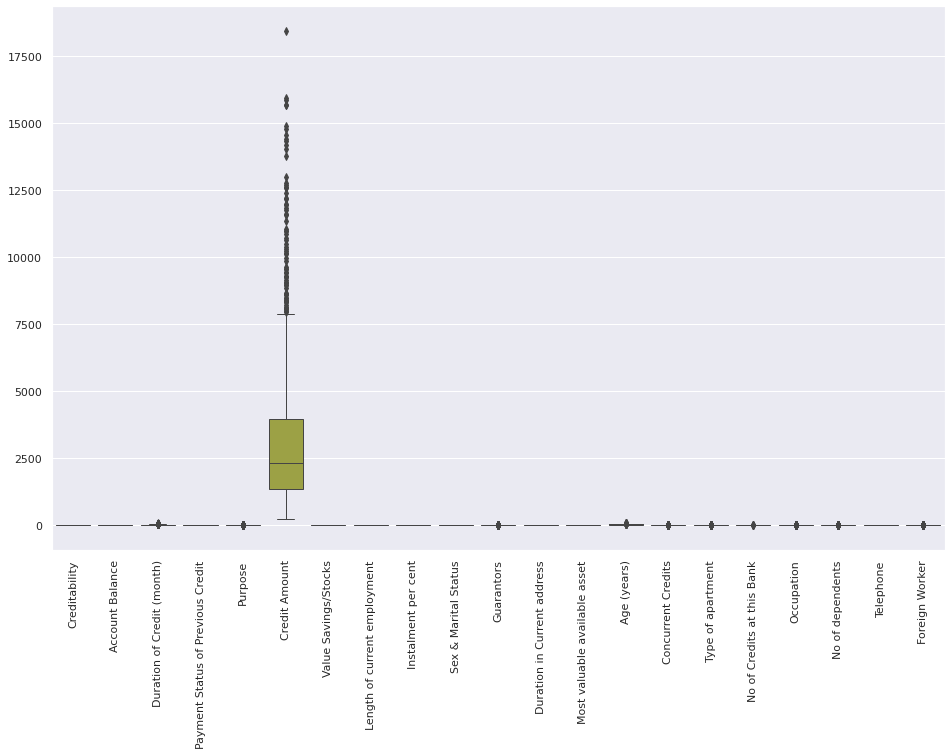

In [7]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= data, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
def outliers (df , ft) :
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound )| (df[ft] > upper_bound )]
    
    return ls

In [9]:
def remove (df, ls ):
    ls = sorted(set(ls))
    df = df.drop(ls)
    
    return df

In [27]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [13]:
index_list = []
for feature in ['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'
]:
    index_list.extend(outliers(data , feature))

In [14]:
df1 = remove(data,index_list)

In [28]:
df.shape , df1.shape

((1000, 21), (251, 21))

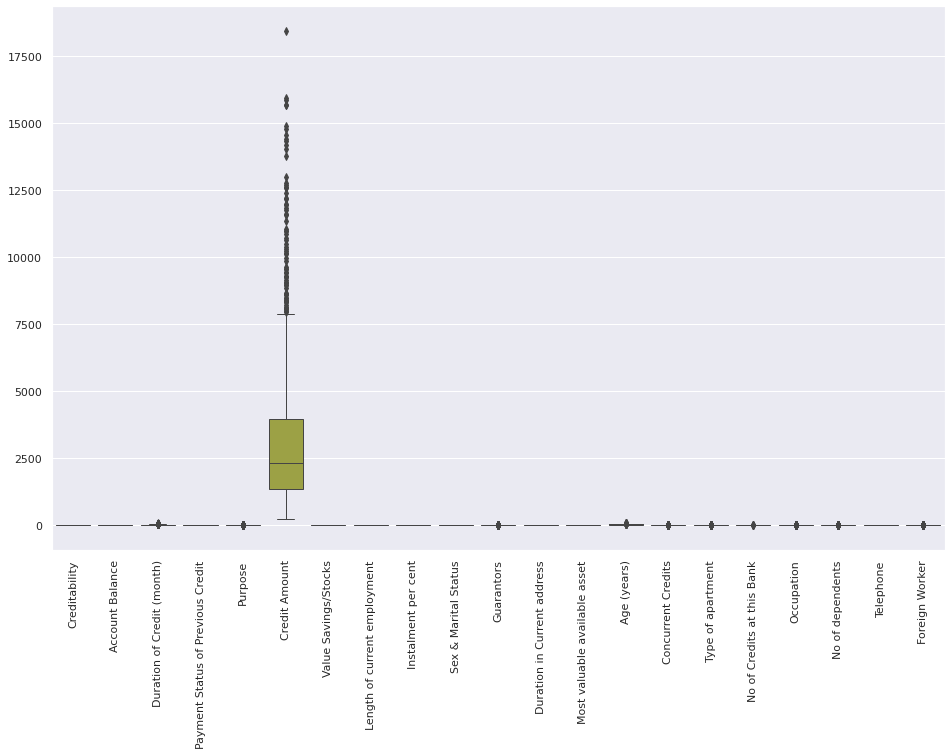

In [29]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

Histogram

In [30]:
df.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


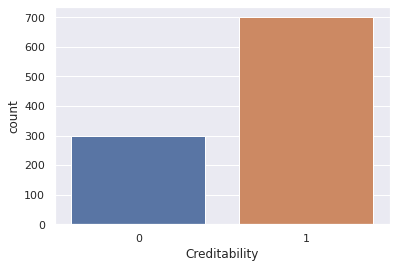

In [31]:
sns.countplot(df['Creditability'])

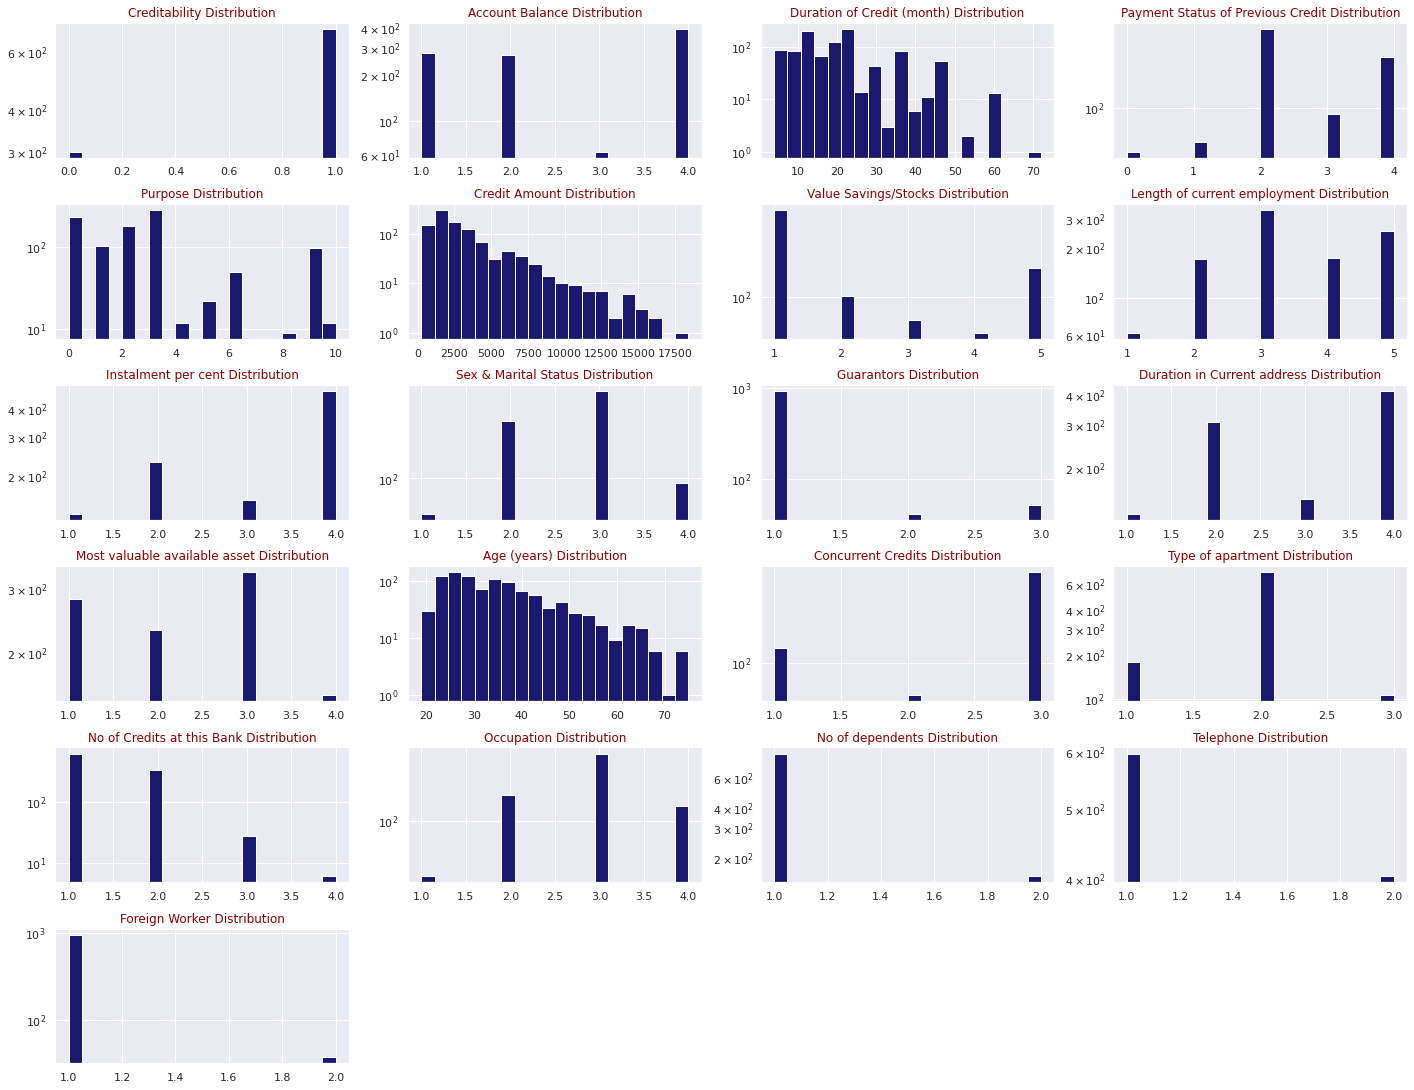

In [32]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,8,4)

In [41]:
#Select K best

X=df.drop("Creditability",axis=1)
Y=df['Creditability']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Select_KBest_rank_features=SelectKBest(score_func=chi2,k=5)
KBest_features=Select_KBest_rank_features.fit(X,Y)

df_Kscores=pd.DataFrame(KBest_features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

kbest_features_rank=pd.concat([dfcolumns,df_Kscores],axis=1)

kbest_features_rank.columns=['Features','K_score']
kbest_features_rank

print(kbest_features_rank.nlargest(15,'K_score'))

                             Features       K_score
4                       Credit Amount  58264.415475
1          Duration of Credit (month)    321.030795
0                     Account Balance     75.474269
5                Value Savings/Stocks     37.937451
12                        Age (years)     30.178268
2   Payment Status of Previous Credit     24.103752
11      Most valuable available asset      9.503534
6        Length of current employment      5.799899
13                 Concurrent Credits      2.243436
7                 Instalment per cent      2.204619
8                Sex & Marital Status      1.452292
3                             Purpose      0.860039
15         No of Credits at this Bank      0.495516
19                     Foreign Worker      0.231483
18                          Telephone      0.228056


[0.11874515 0.08155736 0.06199879 0.05987175 0.08140424 0.05350295
 0.0550613  0.04932344 0.04382973 0.02844778 0.04898758 0.05202155
 0.06531084 0.03020628 0.03415176 0.03214865 0.04345587 0.02262509
 0.03006566 0.00728422]


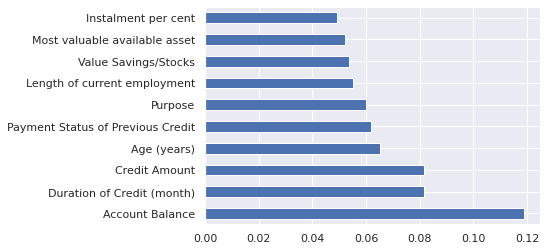

,Features,Score
0,Account Balance,0.118745
1,Duration of Credit (month),0.081557
4,Credit Amount,0.081404
12,Age (years),0.065311
2,Payment Status of Previous Credit,0.061999
3,Purpose,0.059872
6,Length of current employment,0.055061
5,Value Savings/Stocks,0.053503
11,Most valuable available asset,0.052022
7,Instalment per cent,0.049323


In [37]:
from sklearn.ensemble import ExtraTreesClassifier
ET_model=ExtraTreesClassifier()
ET_model.fit(X,Y)

print(ET_model.feature_importances_)

import matplotlib.pyplot as plt
ET_ranked_features=pd.Series(ET_model.feature_importances_,index=X.columns)
ET_ranked_features.nlargest(10).plot(kind='barh')
plt.show()


df_ET_rank =pd.DataFrame(ET_model.feature_importances_)

dfcolumns=pd.DataFrame(X.columns)

ET_features_rank=pd.concat([dfcolumns,df_ET_rank],axis=1)

ET_features_rank.columns=['Features','Score']
ET_features_rank
ET_features_rank.nlargest(10,'Score')

Account Balance                      0.079408
Concurrent Credits                   0.037020
Most valuable available asset        0.031981
Value Savings/Stocks                 0.030792
Telephone                            0.029014
Occupation                           0.027243
Payment Status of Previous Credit    0.022625
Type of apartment                    0.019757
Credit Amount                        0.016874
Guarantors                           0.014717
Duration of Credit (month)           0.010340
Age (years)                          0.010277
No of dependents                     0.004430
Sex & Marital Status                 0.002879
Purpose                              0.002575
dtype: float64


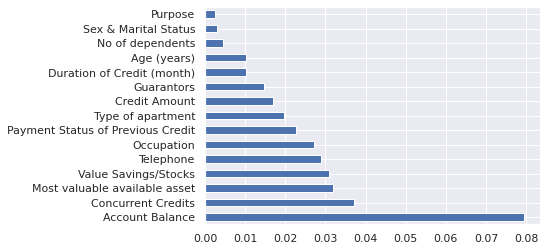

In [42]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,Y)

mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

print(mutual_data.nlargest(15))

mutual_data.nlargest(15).plot(kind='barh')
plt.show()

4                       Credit Amount  58264.415475
1          Duration of Credit (month)    321.030795
0                     Account Balance     75.474269
5                Value Savings/Stocks     37.937451
12                        Age (years)     30.178268
2   Payment Status of Previous Credit     24.103752
11      Most valuable available asset      9.503534
6        Length of current employment      5.799899



Account Balance                      0.079408
Concurrent Credits                   0.037020
Most valuable available asset        0.031981
Value Savings/Stocks                 0.030792
Telephone                            0.029014
Occupation                           0.027243
Payment Status of Previous Credit    0.022625
Type of apartment                    0.019757
Credit Amount                        0.016874
Guarantors                           0.014717
Duration of Credit (month)           0.010340
Age (years)                          0.010277

In [43]:
VIF = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for j in range(X.shape[1]):
    VIF.append(variance_inflation_factor(X.values,j))
print(VIF)

import numpy as np
np.transpose(VIF)
pd.DataFrame(X.columns)
pd.DataFrame(np.transpose(VIF))
pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(VIF))], axis =1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[5.805413661816084, 7.764130168089922, 9.000964424490983, 2.157378339576708, 5.279854426322739, 3.043402613301061, 10.578396489684069, 10.399845259285808, 15.776470397235048, 6.896111505243488, 8.825690643956673, 8.348438293170076, 14.077407755650762, 14.156188121742442, 17.986632766785792, 8.9649608352725, 24.92263035762253, 11.507230945205922, 11.684836346409238, 24.880668267935423]


,0,0
0,Account Balance,5.805414
1,Duration of Credit (month),7.764130
2,Payment Status of Previous Credit,9.000964
3,Purpose,2.157378
4,Credit Amount,5.279854
5,Value Savings/Stocks,3.043403
6,Length of current employment,10.578396
7,Instalment per cent,10.399845
8,Sex & Marital Status,15.776470
9,Guarantors,6.896112


Box-plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


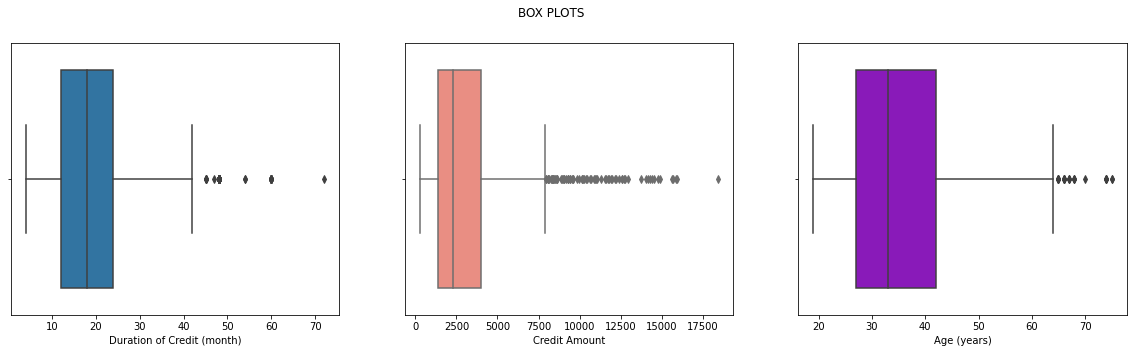

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(df1['Duration of Credit (month)'], ax=ax[0]);
sns.boxplot(df1['Credit Amount'], ax=ax[1], color='salmon');
sns.boxplot(df1['Age (years)'], ax=ax[2], color='darkviolet');

Scatter Plot

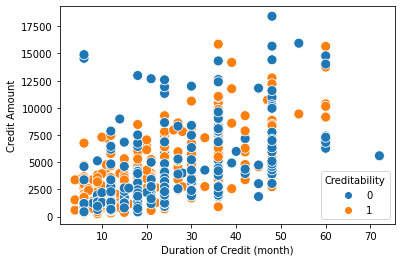

In [ ]:
sns.scatterplot(y=df1['Credit Amount'], 
                x=df1['Duration of Credit (month)'], 
                hue=df1.Creditability, 
                s=100, 
                );

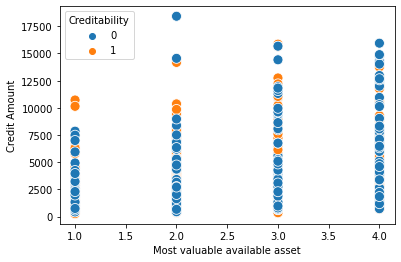

In [ ]:
sns.scatterplot(y=df1['Credit Amount'], 
                x=df1['Most valuable available asset'], 
                hue=df1.Creditability, 
                s=100, 
                );